In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 21_11_2022 07_32_59.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 30_05_2022 09_48_25.xlsx')

In [5]:
dados['pos_pcrflu'] = dados['pos_pcrflu'].map({1:'Sim',2:'Nao',9:'Ignorado'})

In [6]:
dados['tp_flu_pcr'] = dados['tp_flu_pcr'].map({1:'Influenza',2:'Influenza'})

In [7]:
dados['pcr_fluasu'] = dados['pcr_fluasu'].map({1:'Influenza A(H1N1)pdm09',2:'Influenza A(H3N2)',3:'Influenza A nao subtipado',
4:'Influenza A nao subtipavel',5:'Inconclusivo',6:'Outro'})

In [8]:
filtroInfluVSR = dados[['Competencia Evolucao','Classificacao final','Evolucao','Dias Perm Hospital','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]
filtroInfluVSR

,Competencia Evolucao,Classificacao final,Evolucao,Dias Perm Hospital,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
0,NaN,Não Informado,Segue Internado,0.0,NaN,NaN,NaN,NaN
1,NaN,Não Informado,Segue Internado,0.0,NaN,NaN,NaN,NaN
2,NaN,Não Informado,Segue Internado,0.0,NaN,NaN,NaN,NaN
3,NaN,COVID-19,Segue Internado,0.0,NaN,NaN,NaN,NaN
4,2021_05,COVID-19,Óbito,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
184431,2021_02,COVID-19,Óbito,5.0,Nao,NaN,NaN,NaN
184432,2021_09,COVID-19,Cura,13.0,NaN,NaN,NaN,NaN
184433,2021_04,COVID-19,Óbito,29.0,NaN,NaN,NaN,NaN
184434,2020_07,SRAG não especificado,Cura,3.0,NaN,NaN,NaN,NaN


In [9]:
base = filtroInfluVSR.groupby('Competencia Evolucao').count()
base = base.drop(columns=['Classificacao final','Evolucao','Dias Perm Hospital','pos_pcrflu','tp_flu_pcr','pcr_fluasu','pcr_vsr'])
base.tail()

""
Competencia Evolucao
2022_07
2022_08
2022_09
2022_10
2022_11


In [10]:
filtroCovid = dados[['Competencia Evolucao','Classificacao final','Evolucao','Dias Perm Hospital']]
filtroCovid = filtroCovid.loc[filtroCovid['Classificacao final']=='COVID-19']
filtroCovid

,Competencia Evolucao,Classificacao final,Evolucao,Dias Perm Hospital
3,NaN,COVID-19,Segue Internado,0.0
4,2021_05,COVID-19,Óbito,0.0
6,2022_02,COVID-19,Óbito,0.0
7,2021_03,COVID-19,Óbito,0.0
8,2021_03,COVID-19,Óbito,0.0
...,...,...,...,...
184428,2021_03,COVID-19,Óbito,18.0
184430,2021_07,COVID-19,Óbito,0.0
184431,2021_02,COVID-19,Óbito,5.0
184432,2021_09,COVID-19,Cura,13.0


### Cura Influenza e VSR

In [11]:
curaInflu = filtroInfluVSR.loc[filtroInfluVSR['Evolucao']=='Cura']
curaInflu = curaInflu.loc[curaInflu['pos_pcrflu']=='Sim']
curaInflu = curaInflu.sort_values(by='Competencia Evolucao')
curaInflu = curaInflu.set_index('Competencia Evolucao')
curaInflu = curaInflu.drop(columns=['Classificacao final','Evolucao','pos_pcrflu','tp_flu_pcr','pcr_fluasu','pcr_vsr'])
curaInflu = curaInflu.rename(columns={'Dias Perm Hospital':'Dias Perm Hospital Influ'})
curaInflu = curaInflu.drop(['2020_01','2020_02','2020_03'])
curaInflu

,Dias Perm Hospital Influ
Competencia Evolucao,
2020_04,16.0
2020_05,3.0
2020_07,13.0
2020_10,12.0
2021_02,26.0
...,...
NaN,0.0
NaN,0.0
NaN,0.0


In [12]:
curaInflu = filtroInfluVSR.loc[filtroInfluVSR['Evolucao']=='Cura']
curaInflu = curaInflu.loc[curaInflu['pos_pcrflu']=='Sim']
curaInflu = curaInflu.sort_values(by='Competencia Evolucao')
curaInflu = curaInflu.set_index('Competencia Evolucao')
curaInflu = curaInflu.drop(columns=['Classificacao final','Evolucao','pos_pcrflu','tp_flu_pcr','pcr_fluasu','pcr_vsr'])
curaInflu = curaInflu.drop(['2020_01','2020_02','2020_03'])
curaInflu

,Dias Perm Hospital
Competencia Evolucao,
2020_04,16.0
2020_05,3.0
2020_07,13.0
2020_10,12.0
2021_02,26.0
...,...
NaN,0.0
NaN,0.0
NaN,0.0


In [13]:
curaVSR = filtroInfluVSR.loc[filtroInfluVSR['Evolucao']=='Cura']
curaVSR = curaVSR.loc[curaVSR['pcr_vsr']==1]
curaVSR = curaVSR.sort_values(by='Competencia Evolucao')
curaVSR = curaVSR.set_index('Competencia Evolucao')
curaVSR = curaVSR.drop(columns=['Classificacao final','Evolucao','pos_pcrflu','tp_flu_pcr','pcr_fluasu','pcr_vsr'])
curaVSR

,Dias Perm Hospital
Competencia Evolucao,
2020_04,7.0
2020_04,5.0
2020_06,16.0
2020_07,11.0
2021_01,1.0
...,...
NaN,0.0
NaN,0.0
NaN,0.0


In [14]:
curaInfluVSR = pd.concat([curaInflu,curaVSR])
curaInfluVSR = curaInfluVSR.reset_index()
curaInfluVSR = curaInfluVSR.sort_values(by='Competencia Evolucao')
curaInfluVSR = curaInfluVSR.groupby('Competencia Evolucao').median()
curaInfluVSR = curaInfluVSR.merge(base,how='outer',right_index=True, left_index=True)
curaInfluVSR = curaInfluVSR.drop(['2020_01','2020_02','2020_03'])
curaInfluVSR = curaInfluVSR.fillna(0)
curaInfluVSR.head()

,Dias Perm Hospital
Competencia Evolucao,
2020_04,7.0
2020_05,3.0
2020_06,16.0
2020_07,12.0
2020_08,0.0


In [15]:
curaInfluVSR =  curaInfluVSR['Dias Perm Hospital']
curaInfluVSR.tail()

Competencia Evolucao
2022_07    6.0
2022_08    9.0
2022_09    7.0
2022_10    7.0
2022_11    7.0
Name: Dias Perm Hospital, dtype: float64

### Cura COVID

In [16]:
curaCovid = filtroCovid.loc[filtroCovid['Evolucao']=='Cura']
curaCovid = curaCovid.groupby(['Competencia Evolucao']).median()
curaCovid = curaCovid.drop(['2020_03'])
curaCovid = curaCovid.reset_index()
curaCovid.tail()

,Competencia Evolucao,Dias Perm Hospital
27,2022_07,7.0
28,2022_08,7.0
29,2022_09,10.0
30,2022_10,10.0
31,2022_11,8.0


In [17]:
curaCovid = curaCovid['Dias Perm Hospital']
curaCovid.tail()

27     7.0
28     7.0
29    10.0
30    10.0
31     8.0
Name: Dias Perm Hospital, dtype: float64

### Obito Influenza VSR

In [18]:
obitoInflu = filtroInfluVSR.loc[filtroInfluVSR['Evolucao']=='Óbito']
obitoInflu = obitoInflu.loc[obitoInflu['pos_pcrflu']=='Sim']
obitoInflu = obitoInflu.sort_values(by='Competencia Evolucao')
obitoInflu = obitoInflu.set_index('Competencia Evolucao')
obitoInflu = obitoInflu.drop(columns=['Classificacao final','Evolucao','pos_pcrflu','tp_flu_pcr','pcr_fluasu','pcr_vsr'])
obitoInflu = obitoInflu.drop(['2020_01','2020_03'])
obitoInflu

,Dias Perm Hospital
Competencia Evolucao,
2021_03,14.0
2021_12,8.0
2021_12,7.0
2021_12,0.0
2022_01,5.0
...,...
2022_08,40.0
2022_08,61.0
2022_09,61.0


In [19]:
obitoVSR = filtroInfluVSR.loc[filtroInfluVSR['Evolucao']=='Óbito']
obitoVSR = obitoVSR.loc[obitoVSR['pcr_vsr']==1]
obitoVSR = obitoVSR.sort_values(by='Competencia Evolucao')
obitoVSR = obitoVSR.set_index('Competencia Evolucao')
obitoVSR = obitoVSR.drop(columns=['Classificacao final','Evolucao','pos_pcrflu','tp_flu_pcr','pcr_fluasu','pcr_vsr'])
obitoVSR

,Dias Perm Hospital
Competencia Evolucao,
2020_05,10.0
2021_04,5.0
2021_04,6.0
2021_04,3.0
2021_04,4.0
...,...
2022_09,68.0
2022_10,85.0
2022_10,25.0


In [20]:
obitoInfluVSR = pd.concat([obitoInflu,obitoVSR])
obitoInfluVSR = obitoInfluVSR.reset_index()
obitoInfluVSR = obitoInfluVSR.sort_values(by='Competencia Evolucao')
obitoInfluVSR = obitoInfluVSR.groupby('Competencia Evolucao').median()
obitoInfluVSR = obitoInfluVSR.merge(base,how='outer',right_index=True, left_index=True)
obitoInfluVSR = obitoInfluVSR.drop(['2020_01','2020_02','2020_03'])
obitoInfluVSR.tail()

,Dias Perm Hospital
Competencia Evolucao,
2022_07,14.0
2022_08,10.5
2022_09,64.5
2022_10,55.0
2022_11,15.0


In [21]:
obitoInfluVSR = obitoInfluVSR['Dias Perm Hospital']

In [22]:
obitoCovid = filtroCovid.loc[filtroCovid['Evolucao']=='Óbito']
obitoCovid = obitoCovid.groupby(['Competencia Evolucao']).median()
obitoCovid = obitoCovid.drop(['2020_03'])
obitoCovid = obitoCovid.reset_index()
obitoCovid.tail()

,Competencia Evolucao,Dias Perm Hospital
27,2022_07,9.0
28,2022_08,10.0
29,2022_09,12.0
30,2022_10,23.0
31,2022_11,12.0


In [23]:
semana = obitoCovid['Competencia Evolucao']

In [24]:
obitoCovid = obitoCovid['Dias Perm Hospital']
obitoCovid.tail()

27     9.0
28    10.0
29    12.0
30    23.0
31    12.0
Name: Dias Perm Hospital, dtype: float64

In [25]:
legenda = pd.DataFrame(columns=['Óbito por COVID-19','Cura por COVID-19','Óbito por Influenza/VSR','Cura por Influenza/VSR'])

In [26]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 21_11_2022'

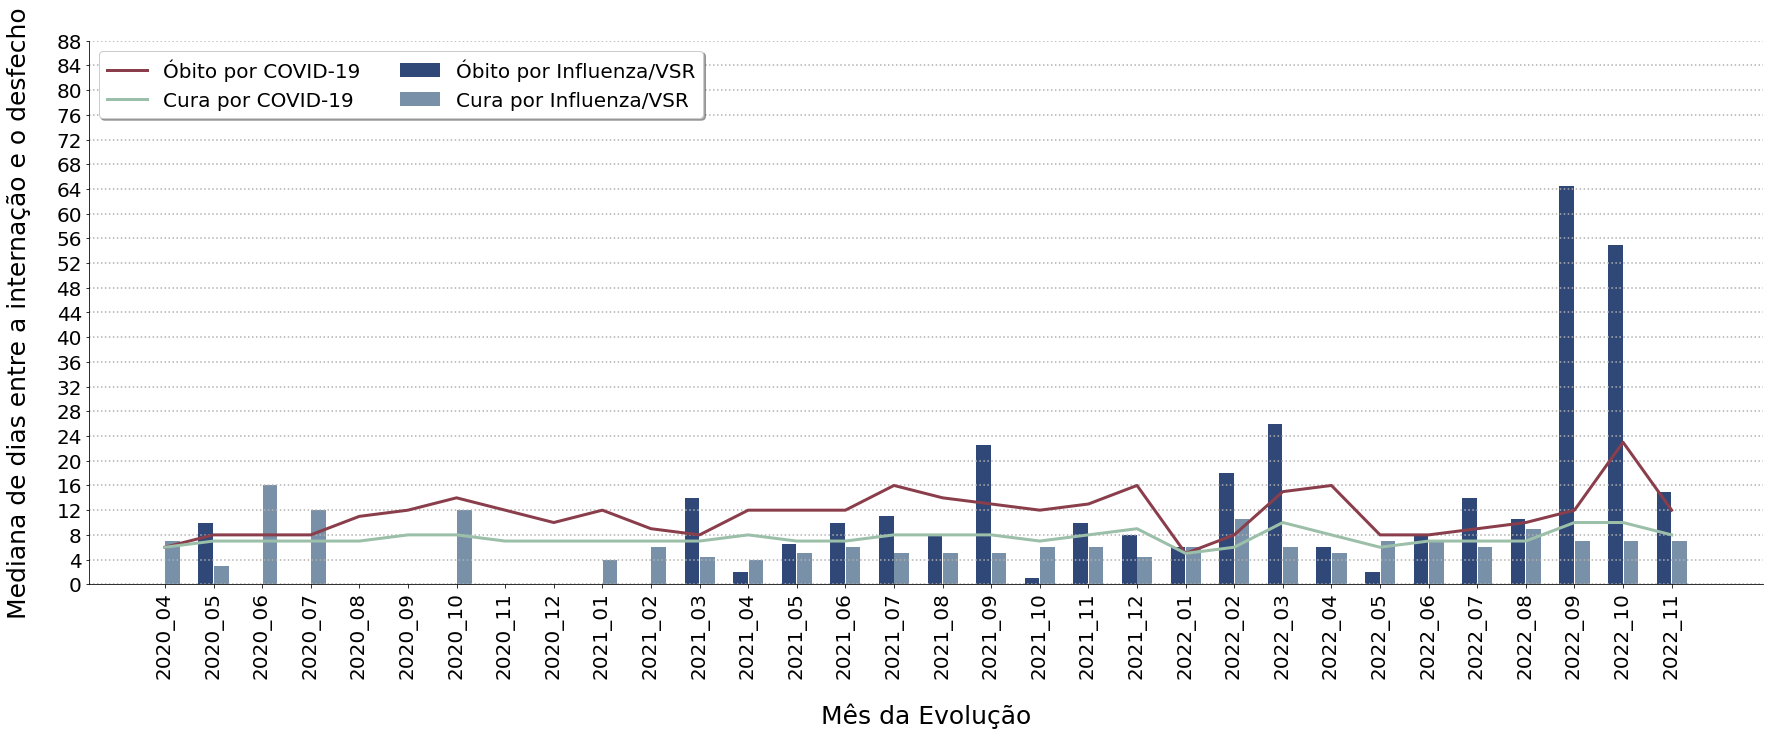

In [27]:
plt.figure(figsize=(30,10))
plt.plot(semana,obitoCovid,color='#8a3e4b',linewidth=3)
plt.plot(semana,curaCovid,color='#9bbfa8',linewidth=3)
plt.bar(np.arange(0,np.size(semana),1)-0.16,obitoInfluVSR,width=0.3,color='#304878')
plt.bar(np.arange(0,np.size(semana),1)+0.16,curaInfluVSR,width=0.3,color='#7890a8')
sns.despine()
plt.xlabel('Mês da Evolução',labelpad=25,fontsize=25)
plt.ylabel('Mediana de dias entre a internação e o desfecho',labelpad=25,fontsize=25)
plt.xticks(np.arange(0,np.size(semana),1),rotation=90,fontsize=20)
plt.yticks(np.arange(0,91,4),fontsize=20)
#plt.legend(legenda,fontsize=25,shadow=True,loc='upper left')
plt.grid(axis='y',linestyle='dotted',linewidth=1.5)
plt.legend(legenda,fontsize=20,shadow=True,ncol=2,loc='upper left')
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/medianaObitoCura_CovidInfluVSR.png',dpi=720,bbox_inches='tight')